In [1]:
#!mkdir data
#!wget https://github.com/KrishnaswamyLab/MAGIC/raw/master/data/HMLE_TGFb_day_8_10.csv.gz -P data
#!wget https://github.com/KrishnaswamyLab/MAGIC/raw/master/data/test_data.csv -P data
#!wget https://github.com/KrishnaswamyLab/PHATE/raw/master/data/BMMC_myeloid.csv.gz -P data

In [1]:
import magic
import scprep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
test_data = pd.read_csv('data/test_data.csv')

In [3]:
test_data

,A1BG-AS1,AAMDC,AAMP,AARSD1,ABCA12,ABCG2,ABHD13,AC007773.2,AC011998.4,AC013470.6,...,KPNA1,KRT8P11,LA16c-OS12.2,LCMT1,LEF1,LIG4,LINC00431,LINC00885,VIM,ZEB1
0,0.0,0.0,0.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,4.690416,0
1,0.0,1.0,0.000000,0,0.0,0.0,1.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,5.385165,0
2,1.0,0.0,1.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,1.0,0,0,4.000000,0
3,0.0,0.0,0.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,6.244998,0
4,0.0,0.0,0.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,4.242641,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,1.0,0.0,0.0,0,0,3.000000,0
496,0.0,0.0,1.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,1.414214,0
497,0.0,0.0,0.000000,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,1.0,0.0,0,0,4.690416,0
498,0.0,0.0,1.414214,0,0.0,0.0,0.0,0,0,0,...,0.0,0,0,0.0,0.0,0.0,0,0,4.000000,0


In [4]:
emt_data = pd.read_csv('data/HMLE_TGFb_day_8_10.csv.gz', compression='gzip', header=0, sep=',', quotechar='"', error_bad_lines=False)

/home/tuba/miniconda3/envs/magic/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
gene_means = emt_data.mean(axis=0)
mask = gene_means > 1
cols = emt_data.columns.to_numpy()[mask]
gene_means[mask]

ACIN1       1.003589
ACSL3       1.536887
ACTB       11.725774
ACTG1      16.309850
ACTN1       7.085870
             ...    
ZBTB7A      1.323275
ZFP36L1     4.320218
ZFP36L2    12.675263
ZNF281      1.072843
pk          1.233019
Length: 675, dtype: float64

In [22]:
sub_data = emt_data[cols]

In [31]:
sub_data.head()

,ACIN1,ACSL3,ACTB,ACTG1,ACTN1,ACTN4,ACTR2,ACTR3,ADAM19,ADRM1,...,YBX3,YKT6,YWHAB,YWHAE,YWHAZ,ZBTB7A,ZFP36L1,ZFP36L2,ZNF281,pk
0,0,0,12,15,5,17,0,1,1,1,...,0,0,6,0,5,1,12,42,2,0
1,2,0,13,9,7,3,0,2,2,0,...,1,0,4,4,5,0,0,8,2,1
2,0,2,18,9,4,14,0,1,3,0,...,1,0,8,1,2,1,4,6,1,0
3,3,2,10,27,9,5,1,2,1,3,...,1,0,5,1,2,4,2,5,1,0
4,1,2,6,7,1,4,0,1,0,1,...,2,0,13,0,3,0,2,4,0,0


<AxesSubplot:>

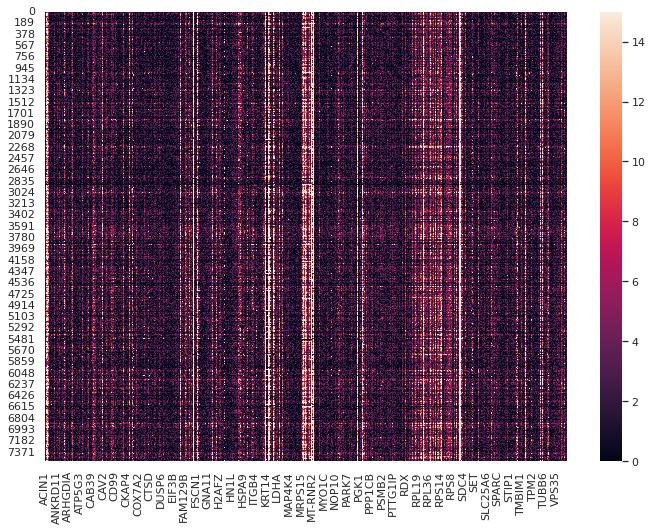

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.heatmap(sub_data, vmin=0, vmax=15)

In [8]:
emt_data.head()

,5S_rRNA,5_8S_rRNA,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A4GALT,AAAS,...,bP-2171C21.6,chr22-38_28785274-29006793.1,pk,snoU109,snoU13,snoU2-30,snoU2_19,snoZ196,uc_338,yR211F11.2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
sns.heatmap(emt_data)

In [32]:
emt_data[['VIM', 'CDH1', 'ZEB1']].head(10)

,VIM,CDH1,ZEB1
0,18,1,0
1,15,1,0
2,21,0,0
3,9,2,0
4,9,0,0
5,22,1,0
6,18,1,0
7,39,1,0
8,29,0,0
9,41,0,0


In [5]:
#scprep.plot.plot_library_size(emt_data, cutoff=1500)

In [6]:
#emt_data = scprep.filter.filter_library_size(emt_data, cutoff=1500)
#emt_data.head()

In [33]:
emt_data = scprep.normalize.library_size_normalize(emt_data)
#emt_data = scprep.transform.sqrt(emt_data)
emt_data[['VIM', 'CDH1', 'ZEB1']].head(10)

,VIM,CDH1,ZEB1
0,42.785833,2.376991,0.0
1,47.801147,3.186743,0.0
2,65.768869,0.000000,0.0
3,23.407022,5.201560,0.0
4,34.416826,0.000000,0.0
5,66.085912,3.003905,0.0
6,55.624227,3.090235,0.0
7,76.500588,1.961554,0.0
8,68.850902,0.000000,0.0
9,114.942529,0.000000,0.0


In [8]:
emt_data[['VIM', 'CDH1', 'ZEB1']].head()

,VIM,CDH1,ZEB1
0,42.785833,2.376991,0.0
1,47.801147,3.186743,0.0
2,65.768869,0.000000,0.0
3,23.407022,5.201560,0.0
4,34.416826,0.000000,0.0


In [34]:
magic_op = magic.MAGIC()
emt_magic = magic_op.fit_transform(emt_data, genes=['VIM', 'CDH1', 'ZEB1'])

Calculating MAGIC...
  Running MAGIC on 7523 cells and 28910 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 9.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 3.60 seconds.
    Calculating affinities...
    Calculated affinities in 3.58 seconds.
  Calculated graph and diffusion operator in 16.62 seconds.
  Calculating imputation...
  Calculated imputation in 0.01 seconds.
Calculated MAGIC in 16.96 seconds.


In [35]:
emt_magic.head()

,CDH1,VIM,ZEB1
0,1.420950,46.220141,0.014136
1,1.216401,43.918229,0.011449
2,1.042301,52.686309,0.044674
3,1.340598,32.472930,0.022706
4,0.958581,43.883934,0.011695


<AxesSubplot:title={'center':'Before MAGIC'}, xlabel='VIM', ylabel='CDH1'>

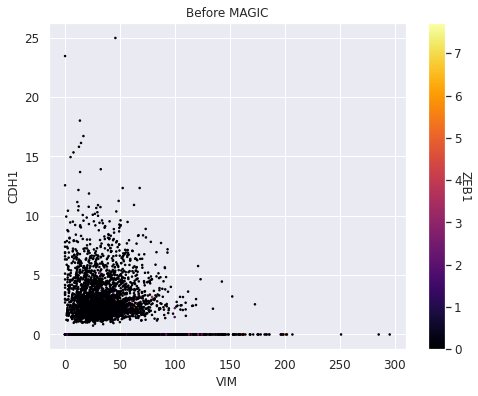

In [36]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
scprep.plot.scatter(x=emt_data['VIM'], y=emt_data['CDH1'], c=emt_data['ZEB1'],  ax=ax,
                    xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='Before MAGIC')


100
150
200
250
300
350


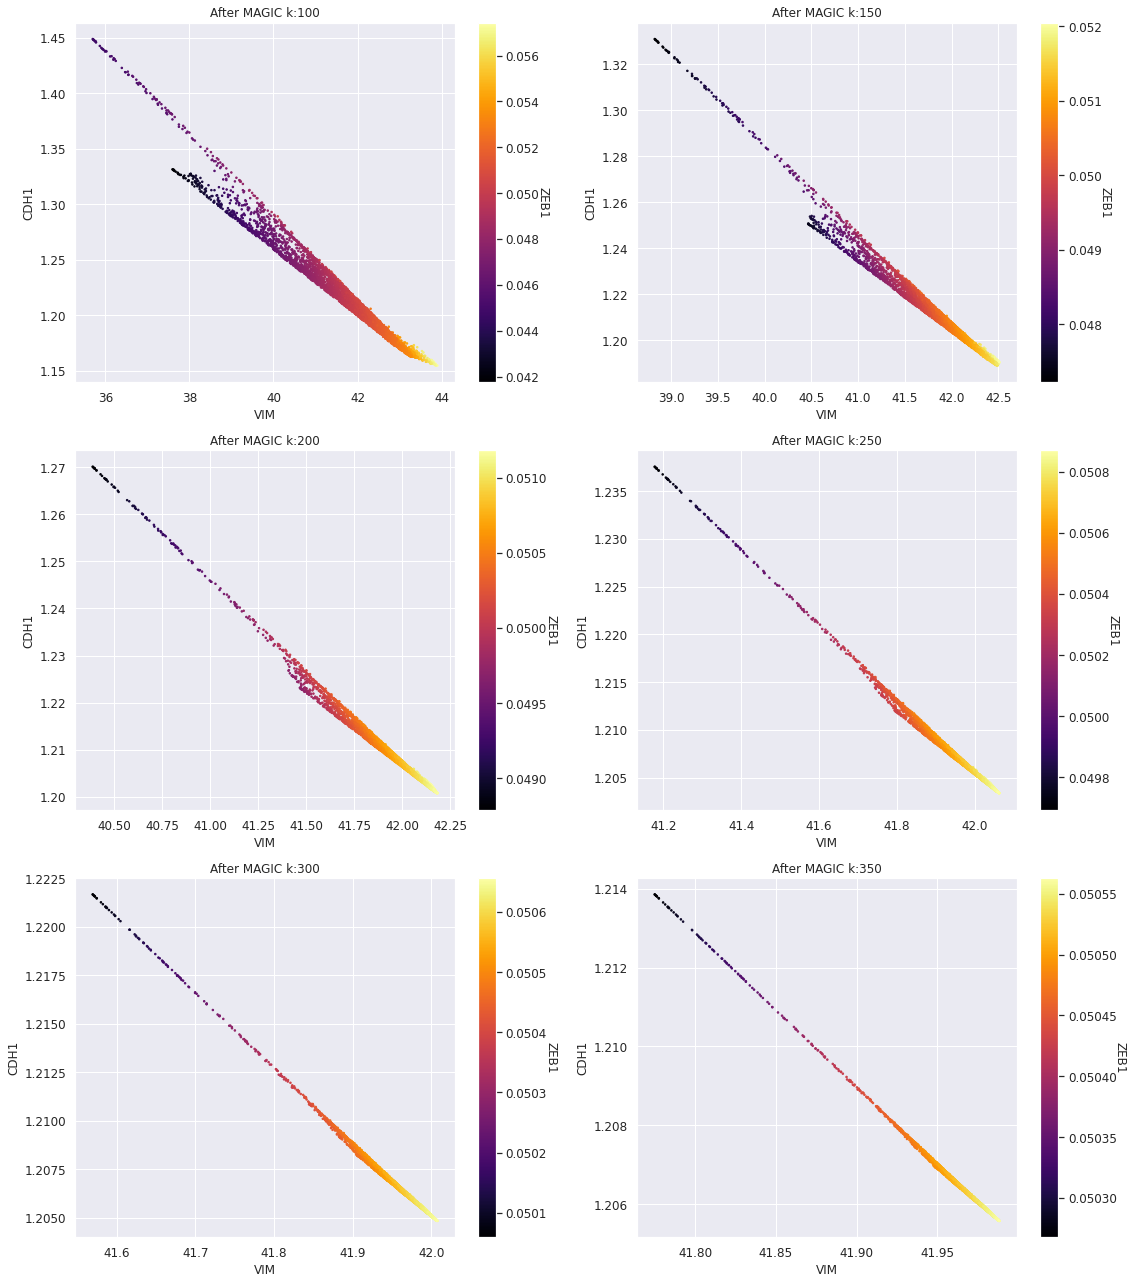

In [50]:
fig, ax = plt.subplots(3,2, figsize=(16, 18))

for idx, t in enumerate([100, 150, 200, 250, 300, 350]):
    print(t)
    magic_op.set_params(t=t)
    magic_op.set_params(knn=5)
    magic_op.set_params(n_jobs = -1)
    magic_op.set_params(verbose=0)
    emt_magic = magic_op.fit_transform(emt_data, genes=['VIM', 'CDH1', 'ZEB1'])

    scprep.plot.scatter(x=emt_magic['VIM'], y=emt_magic['CDH1'], c=emt_magic['ZEB1'], ax=ax[idx//2, idx%2],
                    xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='After MAGIC k:{}'.format(t))

plt.tight_layout()
plt.show()

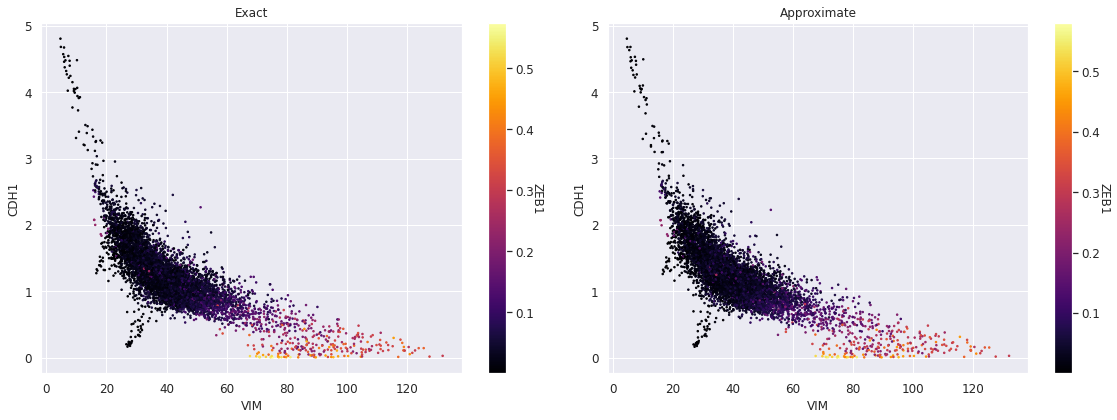

In [48]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))

magic_op.set_params(t=3)
magic_op.set_params(knn=5)
magic_op.set_params(n_jobs = -1)
magic_op.set_params(verbose=0)
magic_op.set_params(solver="approximate")

emt_magic = magic_op.fit_transform(emt_data, genes=['VIM', 'CDH1', 'ZEB1'])

scprep.plot.scatter(x=emt_magic['VIM'], y=emt_magic['CDH1'], c=emt_magic['ZEB1'], ax=ax[1],
                xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='Approximate')

magic_op.set_params(solver="exact")

emt_magic = magic_op.fit_transform(emt_data, genes=['VIM', 'CDH1', 'ZEB1'])

scprep.plot.scatter(x=emt_magic['VIM'], y=emt_magic['CDH1'], c=emt_magic['ZEB1'], ax=ax[0],
                xlabel='VIM', ylabel='CDH1', legend_title="ZEB1", title='Exact')

plt.tight_layout()
plt.show()